# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [3]:
# 데이터 로드
data = pd.read_csv("C:/Users/MYCOM/data/abalone (1).csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [21]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,False,True,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,True,False,False
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,True,False,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,False,True,False


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [4]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [8]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)



## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [7]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [16]:
#릿지모델 생성 및 훈련
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)
#예측값 구하기
preds=ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age=preds*1.5
print(age)

#MSE와 RMSE구하기
neg_mse_scores=cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))

[18.20180561 13.27319576 16.82021839 ... 15.98270987 23.3802673
 15.91998052]


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [11]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [12]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함

for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    # cross_val_score를 이용해 fold의 평균 rmse 를 계산
    neg_mse_scores=cross_val_score(ridge,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds 평군 RMSE {1:.3f}'.format(alpha,avg_rmse))
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산


alpha 0일 때 5 folds 평군 RMSE 2.218
alpha 0.1일 때 5 folds 평군 RMSE 2.222
alpha 1일 때 5 folds 평군 RMSE 2.272
alpha 10일 때 5 folds 평군 RMSE 2.490
alpha 100일 때 5 folds 평군 RMSE 2.659


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [13]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [17]:
#모델 생성 및 훈련
xgb_reg=XGBRegressor(n_estimators=1000)
xgb_reg.fit(X_train,y_train)
#예측값 구하기
preds=xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age=preds*1.5
print(age)

#MSE와 RMSE 구하기

neg_mse_scores=cross_val_score(xgb_reg,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))

[22.647825 13.573023 14.191772 ... 12.97996  23.071804 19.951942]


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<AxesSubplot:>

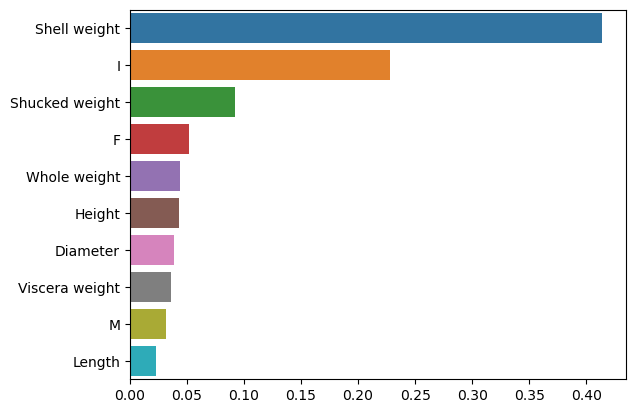

In [22]:
import seaborn as sns
%matplotlib inline
feature_series=pd.Series(data=xgb_reg.feature_importances_,index=data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [23]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [24]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [26]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape) 
print(y_train.shape)

(124, 13)
(124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [34]:
from sklearn.linear_model import LogisticRegression
lr_reg=LogisticRegression()
lr_reg.fit(x_train,y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [39]:
#기울기
lr_clf.coef_

array([[-1.99751228e-01,  3.65450762e-01,  1.49472198e-01,
        -1.88027165e-01, -2.28495271e-02,  1.95456591e-01,
         4.66701515e-01, -1.66796737e-02,  8.23897564e-02,
         6.75012063e-02, -1.92621933e-02,  2.94915909e-01,
         7.42523445e-03],
       [ 5.96476075e-01, -7.88673059e-01, -1.26181508e-01,
         2.12254574e-01, -1.13504547e-02,  3.15786083e-01,
         3.55148170e-01,  3.34675707e-02,  2.79035816e-01,
        -1.17202541e+00,  2.61165815e-01,  4.64731790e-01,
        -8.33633375e-03],
       [-3.96724848e-01,  4.23222297e-01, -2.32906894e-02,
        -2.42274093e-02,  3.41999818e-02, -5.11242674e-01,
        -8.21849686e-01, -1.67878970e-02, -3.61425573e-01,
         1.10452420e+00, -2.41903621e-01, -7.59647700e-01,
         9.11099304e-04]])

In [38]:
#절편
lr_clf.intercept_

array([-0.04177839,  0.0955105 , -0.05373211])

3-3) 모델의 정확도를 구하세요.

In [36]:
#모델의 예측값 구하기

preds=lr_reg.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)


0.9629629629629629